In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import glob
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
def read_data(f):
    df=pd.read_csv(f)
    df['user']=f.split("_")[1]
    return df

In [3]:
def string_to_matrix(df):
    doppz = []
    for d_z in df:
        doppz.append(ast.literal_eval(d_z))
    doppz = np.array(doppz)
    return doppz

In [4]:
df = pd.concat([read_data(f) for f in glob.glob("./data/*")]).reset_index(drop=False)

In [5]:
doppz = string_to_matrix(df['doppz'])

In [31]:
def plot_animation(df, doppz):
    fig, axs = plt.subplots(1,2,figsize=(9,7), gridspec_kw={'width_ratios': [8, 1]})
    fig.show()
    for i in range(doppz.shape[0]):
        axs[0].cla();axs[1].cla()
        axs[0].set_title(df['activity'][i])
        sns.heatmap(doppz[i],ax=axs[0],cbar_ax=axs[1])
        fig.canvas.draw()

<IPython.core.display.Javascript object>


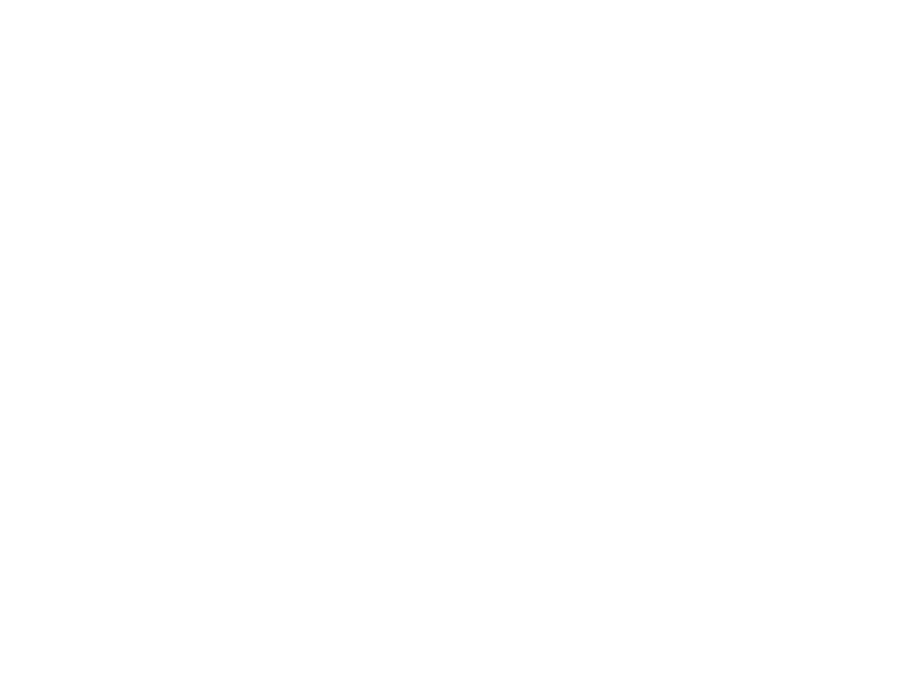

KeyboardInterrupt: 

In [32]:
plot_animation(df, doppz)

In [36]:
def plot_relation(df,xlim0=100,xlim1=700):
    doppz = string_to_matrix(df['doppz'])
    fig=plt.figure(figsize=(12,7))
    ax=fig.add_subplot(311)
    map_dict=dict(zip(['looking forward', 'Talking', 'yawning', 'looking right', 'looking left', 'looking up'],
                      ['k', 'orange', 'blue', 'cyan', 'red','green']))
    labels=df['activity'].map(map_dict)
    print(labels)
    sum_val = doppz.reshape(-1,128*64).sum(axis=1)
    count = 0
    sum_processed = []
    for v in sum_val:
#         if v <18000000:
#             count+=1
        sum_processed.append(v)
#         else:
#             sum_processed.append(18000000)
    ax.scatter(range(len(sum_processed)),sum_processed,c=labels)
    ax.plot(range(len(sum_processed)),sum_processed,linestyle='--',c='k')
    ax.set_xlim(xlim0,xlim1)

    pathes = [mpatches.Patch(color=c, label=v) for v,c in map_dict.items()]
    ax.legend(handles=pathes,ncol=3,bbox_to_anchor=(0.3, 1.05))

    ax=fig.add_subplot(312)
    ax.plot(df['mar'].values, label='mar')
    ax.set_xlim(xlim0,xlim1)
    ax.legend()

    ax=fig.add_subplot(313)
    ax.plot(df['y'].values, label='y')
    ax.plot(df['x'].values, label='x')
    ax.legend()
    ax.set_xlim(xlim0,xlim1)

<IPython.core.display.Javascript object>


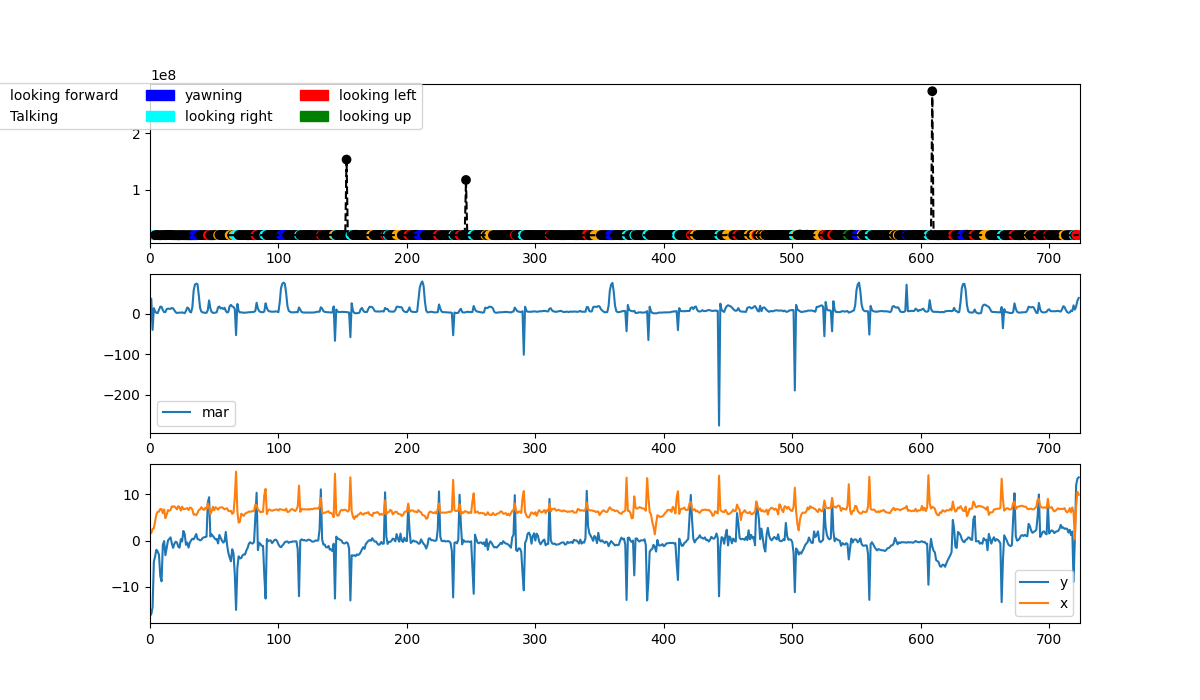

4052    cyan
4053    cyan
4054    cyan
4055    cyan
4056       k
        ... 
4771    cyan
4772       k
4773     red
4774     red
4775     red
Name: activity, Length: 724, dtype: object


In [37]:
plot_relation(df[df.user=='bishakh1'],0,len(df[df.user=='bishakh1']))